# Deep Learning with CNN

### Importing libs ....

In [3]:
from tensorflow.keras import layers
from tensorflow import keras 
import tensorflow as tf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

print(tf.__version__)

2.4.1


### Constants

In [4]:
BATCH_SIZE = 32

### Dataset loading

In [5]:
# Download the mnist dataset
mnist = tf.keras.datasets.mnist

# Load the dataset into '_raw' varible: They'll need further processing.
(X_train, y_train), (X_test, y_test) = mnist.load_data()

### Custom Function

In [6]:
def pprint_numpy_matrix(mat, fmt="g"):
    """Pretty print a numpy matrix"""

    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]

    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")

## Exploratory data analysis

As always, a minimum of visualization and cleaning is required.

#### Get the types of the variables

In [7]:
print("X_train", type(X_train))
print("y_train", type(y_train))

X_train <class 'numpy.ndarray'>
y_train <class 'numpy.ndarray'>


#### Shapes 

In [8]:
X_train.shape

(60000, 28, 28)

In [9]:
y_train.shape

(60000,)

The train data are 60 000 images of 28x28 pixels, labeled.

#### Target

In [10]:
y_train[0]

5

The target are a 60 000 array. Each entry contain the number corresponfing to the image.

## Display the images
About the images we'll be training on:

* Each one is 28 pixels by 28 pixels, and totally black and white.
* The 28 rows and 28 columns of numbers in the training data correspond to the 28 rows and 28 columns of pixels in the image.
* The darkness of each pixel is represented as a number in the training data, where 0 is a white pixel and 255 is a black pixel.

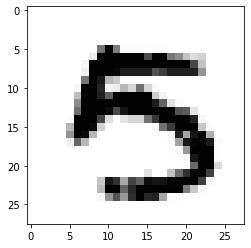

This image represents the number 5


In [11]:
# index can goes from 0 to 59 999
index = 1526

# Plot the image
plt.imshow(X_train[index], cmap='Greys', interpolation='nearest')
plt.show()

# Print the image label
print('This image represents the number', y_train[index])

In [12]:
pprint_numpy_matrix(X_train[index])

0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  
0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  
0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  
0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  
0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  
0  0  0  0  0    0    0    0    1  158  255  151    7    7    7    4    7    7    2    0    0    0    0    0   0  0  0  0  
0  0  0  0  0    0    0    1   37  253  253  253  253  253  253  196  253  253  156  136   89   59   71    0   0  0  0  0  
0  0  0  0  0    0    0   19  253  253  253  253  253  253  253  253  253  253  253  253  253  199   88    0   0  0  0  0  
0  0  0 

## Data Cleaning

In [13]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [14]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### Reshape the features
As described here: https://stackoverflow.com/questions/44747343/keras-input-explanation-input-shape-units-batch-size-dim-etc

2D convolutional layers need inputs at least as:

* if using channels_last: (batch_size, imageside1, imageside2, channels)
* if using channels_first: (batch_size, channels, imageside1, imageside2)
* So, in this case, our 2Dconv layer need a 4-dim input of (None, width, height, channel). Currently, we have only a (None, width, height) input. Let's create a 4th empty dimenstion:

In [15]:
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

#### Cast features to float32

In [16]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

#### Features rescaling

In [17]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [18]:
# Check if the rescaling occurred correctly
print("min", X_train[index].min())
print("max", X_train[index].max())

min 0.0
max 1.0


## Model creation

In [19]:
def create_model():

    # Init a sequential model
    model = keras.Sequential([


        # Part 1: Feature detector
        # --------------------------------------------------------------------------

        # First VGG block
        # Hidden layer 1: 32 filters, 3x3 kernel, relu activation function
        layers.Conv2D(32, (3, 3), padding='same', input_shape=(28, 28, 1), kernel_initializer='he_uniform', activation='relu'),
        layers.BatchNormalization(),

        # Hidden layer 2: 32 filters, 3x3 kernel, relu activation function
        layers.Conv2D(32, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'),
        layers.MaxPooling2D((2, 2)),


        # Second VGG block
        # Hidden layer 3: 64 filters, 3x3 kernel, relu activation function
        layers.Conv2D(64, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'),

        # Hidden layer 4: 64 filters, 3x3 kernel, relu activation function
        layers.Conv2D(64, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'),
        layers.MaxPooling2D((2, 2)),


        # Third VGG block
        # Hidden layer 5: 128 filters, 3x3 kernel, relu activation function
        layers.Conv2D(128, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'),

        # Hidden layer 6: 128 filters, 3x3 kernel, relu activation function
        layers.Conv2D(128, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),


        # Part 2: classifier
        # --------------------------------------------------------------------------

        # Simple ANN
        layers.Dense(200, kernel_initializer='he_uniform', activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),


        # Output layer
        layers.Dense(10, activation='softmax')

    ])

    # Compile model 
    model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer="adam",
              metrics=['accuracy'])

    return model

In [20]:
model = create_model()

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0

### Dataset augmentation
API: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

In [22]:
datagen = keras.preprocessing.image.ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    rotation_range=360)

In [23]:
datagen.fit(X_train)

In [24]:
augmented_train = datagen.flow(X_train, y_train, batch_size=BATCH_SIZE)

In [25]:
steps = int(X_train.shape[0] / BATCH_SIZE)

with tf.device('/device:GPU:0'):
    history = model.fit(augmented_train, steps_per_epoch=steps, epochs=10, validation_data=(X_test, y_test), shuffle=True)

Epoch 1/10
1875/1875 [==============================] - 23s 10ms/step - loss: 1.1605 - accuracy: 0.6203 - val_loss: 0.4751 - val_accuracy: 0.8481
Epoch 2/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3436 - accuracy: 0.8886 - val_loss: 0.2730 - val_accuracy: 0.9103
Epoch 3/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2742 - accuracy: 0.9126 - val_loss: 0.1896 - val_accuracy: 0.9376
Epoch 4/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2326 - accuracy: 0.9254 - val_loss: 0.1526 - val_accuracy: 0.9509
Epoch 5/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2034 - accuracy: 0.9347 - val_loss: 0.2010 - val_accuracy: 0.9385
Epoch 6/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1924 - accuracy: 0.9391 - val_loss: 0.1499 - val_accuracy: 0.9496
Epoch 7/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1798 - accuracy: 0.9435 - val_loss: 0.1094 -

## Evaluation

In [26]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 96.41%


In [27]:
width, height, *_ = X_train[0].shape
example = X_train[0].reshape(1, width, height, 1)

In [28]:
model.predict(example)

array([[1.15425721e-07, 3.92340581e-07, 3.53613352e-08, 3.87944638e-05,
        1.07195374e-04, 9.99768555e-01, 6.59006946e-06, 8.33870399e-06,
        2.02545216e-05, 4.97918918e-05]], dtype=float32)

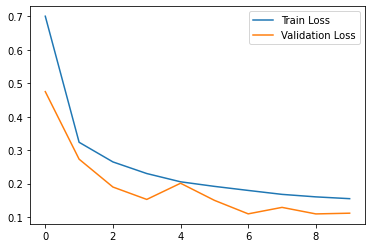

In [29]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

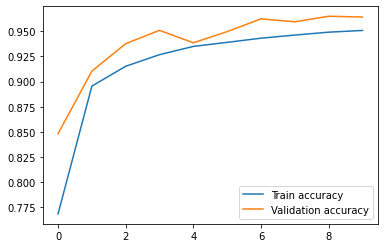

In [30]:
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.legend()
plt.show()

### Saving model

In [32]:
model.save('models/mnist_cnn_model.h5')